In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define la función f_n
def f_n(z, n, N, k, gamma, delta):
    term1 = (-1) ** n * k * z * ((N + 2)**2 - z**2)
    term2 = -2 * gamma * z * np.sqrt(N**2 - z**2)
    term3 = delta * ((N + 2)**2 - z**2) * np.sqrt(N**2 - z**2)
    return term1 + term2 + term3

def find_roots_vs_N(Ns, k, gamma, delta, dz):
    ROOTS_0 = []
    ROOTS_1 = []

    for N in Ns:
        z_vals = np.arange(-N + dz, N - dz, dz)

        for n, ROOTS in zip([0, 1], [ROOTS_0, ROOTS_1]):
            f_vals = [f_n(z, n, N, k, gamma, delta) for z in z_vals]
            f_vals = np.array(f_vals)

            roots = []
            sign_ref = np.sign(f_vals[0])

            for i in range(1, len(f_vals)):
                sign_now = np.sign(f_vals[i])
                if sign_now != sign_ref and sign_now != 0:
                    z_root = 0.5 * (z_vals[i-1] + z_vals[i])
                    roots.append(z_root)
                    sign_ref = sign_now

            ROOTS.append(roots)

    # Aplanar resultados
    N_vals_0, z_roots_0 = [], []
    N_vals_1, z_roots_1 = [], []

    for i, root_list in enumerate(ROOTS_0):
        for r in root_list:
            N_vals_0.append(Ns[i])
            z_roots_0.append(r)

    for i, root_list in enumerate(ROOTS_1):
        for r in root_list:
            N_vals_1.append(Ns[i])
            z_roots_1.append(r)

    return (np.array(N_vals_0), np.array(z_roots_0),
            np.array(N_vals_1), np.array(z_roots_1))

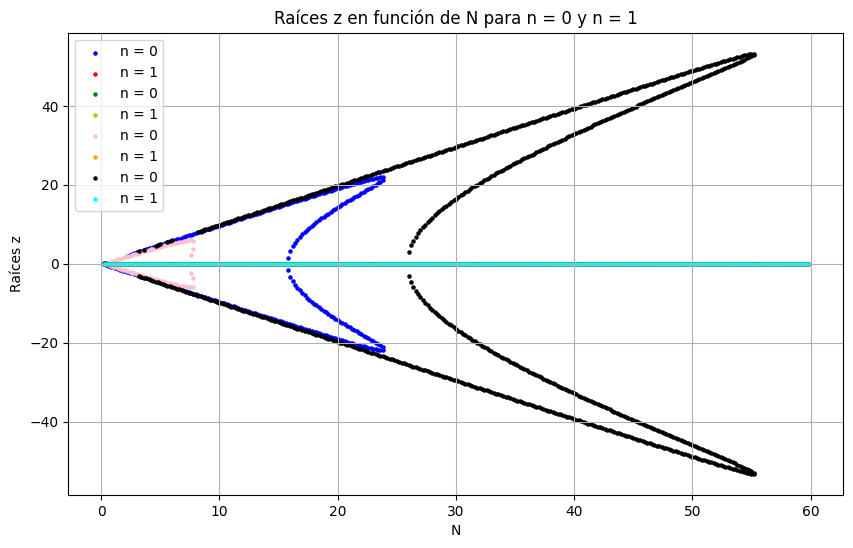

In [5]:
Ns = np.arange(0.2, 60, 0.2)
k, gamma, delta, dz = 1.0, 10.0, 0.00, 0.05
N_vals_0a, z_roots_0a, N_vals_1a, z_roots_1a = find_roots_vs_N(Ns, k, gamma, delta, dz)

k, gamma, delta, dz = 1.0, 2.0, 0.00, 0.05
N_vals_0b, z_roots_0b, N_vals_1b, z_roots_1b = find_roots_vs_N(Ns, k, gamma, delta, dz)

k, gamma, delta, dz = 1.0, 6.0, 0.00, 0.05
N_vals_0c, z_roots_0c, N_vals_1c, z_roots_1c = find_roots_vs_N(Ns, k, gamma, delta, dz)

k, gamma, delta, dz = 1.0, 15.0, 0.00, 0.05
N_vals_0d, z_roots_0d, N_vals_1d, z_roots_1d = find_roots_vs_N(Ns, k, gamma, delta, dz)

plt.figure(figsize=(10, 6))
plt.scatter(N_vals_0a, z_roots_0a, s=5, color='blue', label='n = 0')
plt.scatter(N_vals_1a, z_roots_1a, s=5, color='red', label='n = 1')
plt.scatter(N_vals_0b, z_roots_0b, s=5, color='g', label='n = 0')
plt.scatter(N_vals_1b, z_roots_1b, s=5, color='y', label='n = 1')
plt.scatter(N_vals_0c, z_roots_0c, s=5, color='pink', label='n = 0')
plt.scatter(N_vals_1c, z_roots_1c, s=5, color='orange', label='n = 1')
plt.scatter(N_vals_0d, z_roots_0d, s=5, color='k', label='n = 0')
plt.scatter(N_vals_1d, z_roots_1d, s=5, color='cyan', label='n = 1')
plt.xlabel('N')
plt.ylabel('Raíces z')
plt.title('Raíces z en función de N para n = 0 y n = 1')
plt.legend()
plt.grid(True)
plt.show()